The Iris dataset is a classic dataset in machine learning, introduced by Ronald Fisher in 1936. It contains 150 samples of iris flowers from three species: Setosa, Versicolor, and Virginica. Each sample has four features—sepal length, sepal width, petal length, and petal width—used for classification tasks. It’s widely used for pattern recognition, clustering, and classification algorithms.


k-Nearest Neighbors (k-NN)

Locally Weighted Regression (not typically used for classification, but can be adapted)

ID3 Algorithm

Naïve Bayes

PCA (for visualization / dimensionality reduction)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree


Load & Preprocess Data

In [69]:
# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# DataFrame view
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [70]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


PCA (for visualization)

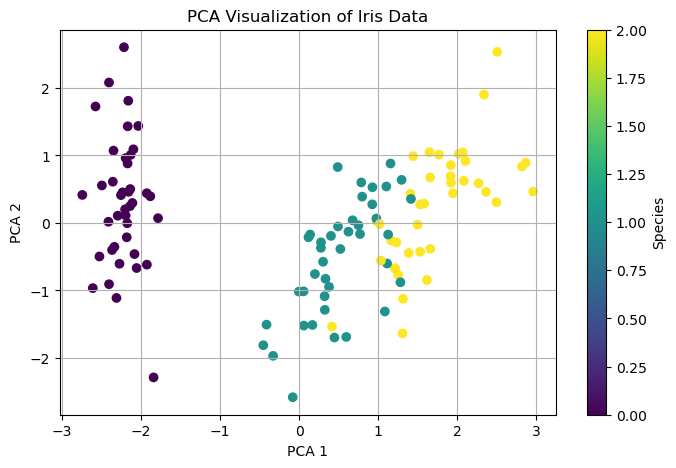

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)


plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.title("PCA Visualization of Iris Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Species')
plt.grid()
plt.show()


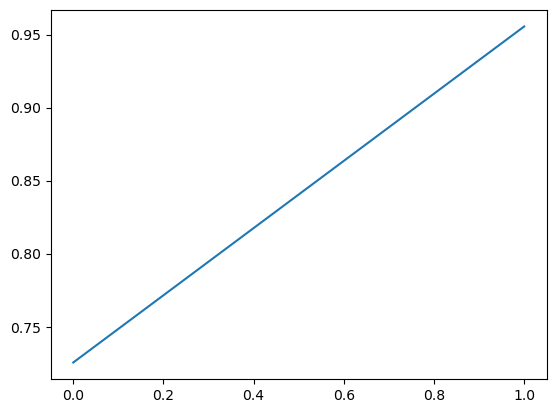

In [72]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

k-Nearest Neighbors (k-NN)

In [73]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

k-NN Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Naïve Bayes Classifier

In [74]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naïve Bayes Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



ID3 Algorithm (using DecisionTreeClassifier)

ID3 (Decision Tree) Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



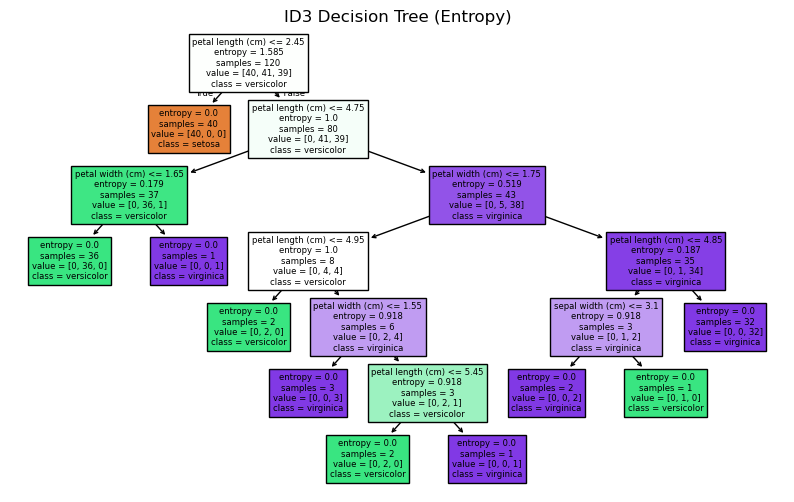

In [75]:
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3.fit(X_train, y_train)
y_pred_id3 = id3.predict(X_test)

print("ID3 (Decision Tree) Accuracy:", accuracy_score(y_test, y_pred_id3))
print(classification_report(y_test, y_pred_id3))

# Plot tree
plt.figure(figsize=(10, 6))
plot_tree(id3, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("ID3 Decision Tree (Entropy)")
plt.show()
